In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# Load the data
df = pd.read_csv('dataset_2023_with_cluster_label_second.csv')
display(df)

# Separate features and labels
X = df.drop(columns=['CLUSTER'])
y = df['CLUSTER']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,...,FLVVAPREC,SYNMRJREC,SYNSTMREC,IMFNDLEVER,FLVVAPYR,FLVVAPMON,ILIMFOTHMN,CODRGUSE,LANGVER,CLUSTER
0,10.0,2.0,0.0,1.0,1.0,9.0,4.0,2.0,7.0,3.0,...,91.0,91.0,91.0,91.0,0.0,0.0,0.0,91.0,1.0,0
1,9.0,2.0,0.0,1.0,4.0,8.0,3.0,2.0,1.0,2.0,...,91.0,3.0,91.0,91.0,0.0,0.0,0.0,93.0,1.0,1
2,9.0,3.0,0.0,2.0,1.0,8.0,4.0,2.0,4.0,2.0,...,91.0,91.0,91.0,91.0,0.0,0.0,1.0,3.0,1.0,1
3,10.0,1.0,0.0,1.0,1.0,11.0,4.0,2.0,6.0,4.0,...,91.0,91.0,91.0,91.0,0.0,0.0,0.0,93.0,1.0,0
4,4.0,3.0,0.0,1.0,4.0,8.0,2.0,1.0,1.0,2.0,...,91.0,91.0,91.0,91.0,0.0,0.0,0.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50528,9.0,4.0,0.0,2.0,4.0,1.0,3.0,2.0,7.0,1.0,...,91.0,91.0,91.0,91.0,0.0,0.0,0.0,98.0,2.0,0
50529,11.0,2.0,0.0,2.0,1.0,10.0,4.0,2.0,1.0,3.0,...,91.0,91.0,91.0,91.0,0.0,0.0,0.0,94.0,1.0,0
50530,10.0,2.0,0.0,2.0,4.0,11.0,4.0,2.0,1.0,4.0,...,91.0,91.0,91.0,91.0,0.0,0.0,0.0,1.0,1.0,1
50531,11.0,2.0,0.0,1.0,1.0,11.0,4.0,2.0,5.0,4.0,...,91.0,91.0,91.0,91.0,0.0,0.0,0.0,93.0,1.0,0


In [8]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Evaluate
y_pred = logreg.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.4f}")

Test accuracy: 0.9442


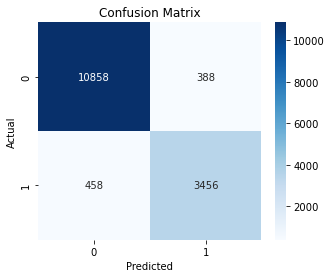

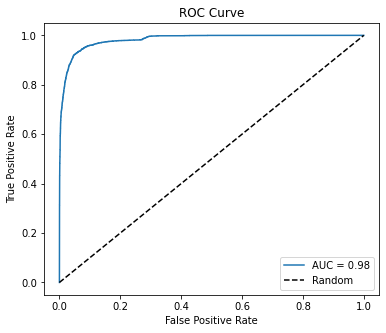

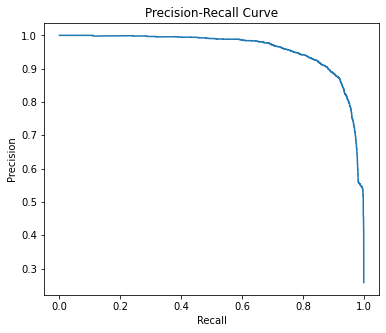

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Predict probabilities
y_prob = logreg.predict_proba(X_test)[:, 1]
y_pred = logreg.predict(X_test)

# 1. Confusion Matrix: mistakes model is making
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. ROC Curve: True Positive vs False Positive
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 3. Precision-Recall Curve: minimizing false positives vs catching as many positives
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

# Setup
X_array = X.values  # if X is a DataFrame
y_array = y.values  # if y is a Series

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []
aucs = []

for fold, (train_index, test_index) in enumerate(skf.split(X_array, y_array)):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    accuracies.append(acc)
    aucs.append(auc)
    
    print(f"Fold {fold+1}: Accuracy = {acc:.4f}, AUC = {auc:.4f}")

# Summary
print("\nAverage Accuracy:", np.mean(accuracies))
print("Average AUC:", np.mean(aucs))

/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1: Accuracy = 0.9699, AUC = 0.9959


/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2: Accuracy = 0.9682, AUC = 0.9949
Fold 3: Accuracy = 0.9677, AUC = 0.9950

Average Accuracy: 0.9685947537788314
Average AUC: 0.9952542974972579


/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XGBoost

/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:11:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9869
AUC: 0.9992


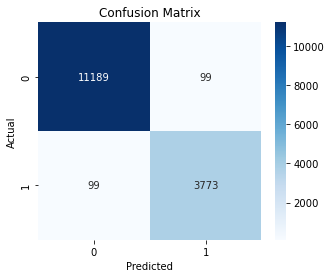

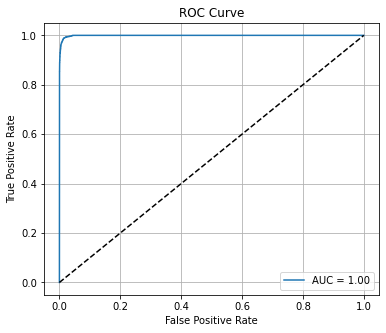

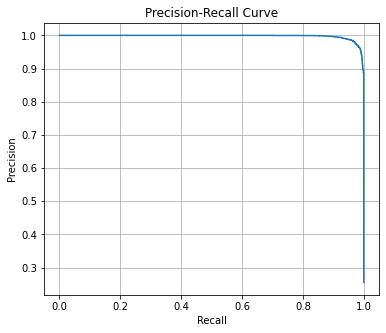

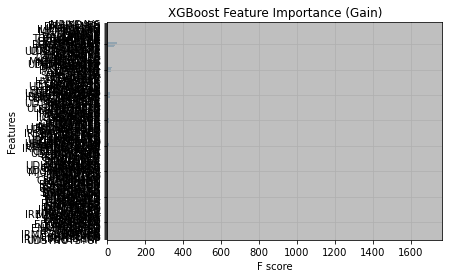

In [22]:
import xgboost as xgb

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 2. Train XGBoost model
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=4,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 3. Predict
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# 4. Evaluate
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")

# === PLOTS ===

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 7. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

# 8. Feature Importance (only if using original features)
if hasattr(X, 'columns'):
    xgb.plot_importance(xgb_model, importance_type='gain', show_values=False)
    plt.title("XGBoost Feature Importance (Gain)")
    plt.show()


/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:10:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1: AUC = 0.9993


/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:10:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2: AUC = 0.9991


/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3: AUC = 0.9991


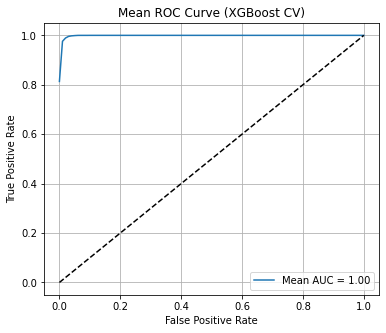

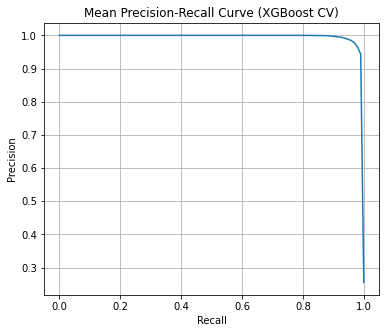


Average AUC across folds: 0.9992


In [21]:
X_array = X.values if hasattr(X, "values") else X  # in case X is a DataFrame
y_array = y.values if hasattr(y, "values") else y

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
tprs, aucs, precisions, recalls = [], [], [], []
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)

for fold, (train_idx, test_idx) in enumerate(skf.split(X_array, y_array)):
    X_train, X_test = X_array[train_idx], X_array[test_idx]
    y_train, y_test = y_array[train_idx], y_array[test_idx]
    
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=4)
    model.fit(X_train, y_train)
    
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # AUC
    auc = roc_auc_score(y_test, y_prob)
    aucs.append(auc)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    
    # PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))  # sort for interp
    recalls.append(np.interp(mean_recall, recall[::-1], recall[::-1]))

    print(f"Fold {fold+1}: AUC = {auc:.4f}")

# === Plot Mean ROC Curve ===
plt.figure(figsize=(6,5))
mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(aucs)
plt.plot(mean_fpr, mean_tpr, label=f"Mean AUC = {mean_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Mean ROC Curve (XGBoost CV)")
plt.legend()
plt.grid(True)
plt.show()

# === Plot Mean Precision-Recall Curve ===
plt.figure(figsize=(6,5))
mean_precision = np.mean(precisions, axis=0)
plt.plot(mean_recall, mean_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Mean Precision-Recall Curve (XGBoost CV)")
plt.grid(True)
plt.show()

print(f"\nAverage AUC across folds: {mean_auc:.4f}")

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define a custom scorer for AUC
def auc_scorer(model, X, y):
    y_prob = model.predict_proba(X)[:, 1]  # probabilities for class 1
    return roc_auc_score(y, y_prob)

# XGBoost model setup
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=4)

# Stratified K-Folds cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation with accuracy (default) and AUC
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
auc_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(auc_scorer))

# Print results
print(f"Accuracy scores across folds: {accuracy_scores}")
print(f"Average accuracy: {accuracy_scores.mean():.4f}")

print(f"\nAUC scores across folds: {auc_scores}")
print(f"Average AUC: {auc_scores.mean():.4f}")

/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:15:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:15:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:15:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:15:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, U

Accuracy scores across folds: [0.98747403 0.98622655 0.98551413]
Average accuracy: 0.9864

AUC scores across folds: [nan nan nan]
Average AUC: nan


/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/Users/yeninda/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
TypeError: auc_scorer() missing 1 required positional argument: 'y'

  warnings.warn(
